First install the repo and requirements.

In [ ]:
%pip --quiet install git+https://github.com/wilson-labs/cola.git

# PCA on Massive Datasets

In this example we will show using CoLA to perform PCA on a massive dataset.

In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

import time
import torch
import cola
import jax.numpy as jnp
#from cola.fns import lazify
# from cola.algorithms.svd import randomized_svd

N, D = 100000, 300
dtype = torch.float32
data = torch.randn(N, D, dtype=dtype)
dtype = jnp.float32
#data = jnp.array(data.numpy())

print(f"Dataset (N={data.shape[0]:,d} | D={data.shape[1]:,d})")

k = 50
X = cola.lazify(data)

Dataset (N=100,000 | D=300)


In [6]:
x = torch.linspace(-1,1,100)
C = cola.lazify(torch.exp(-2*(x[None]-x[:,None])**2))
C = C+1e-4*cola.ops.I_like(C)

In [4]:
C = X.T@X/N

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

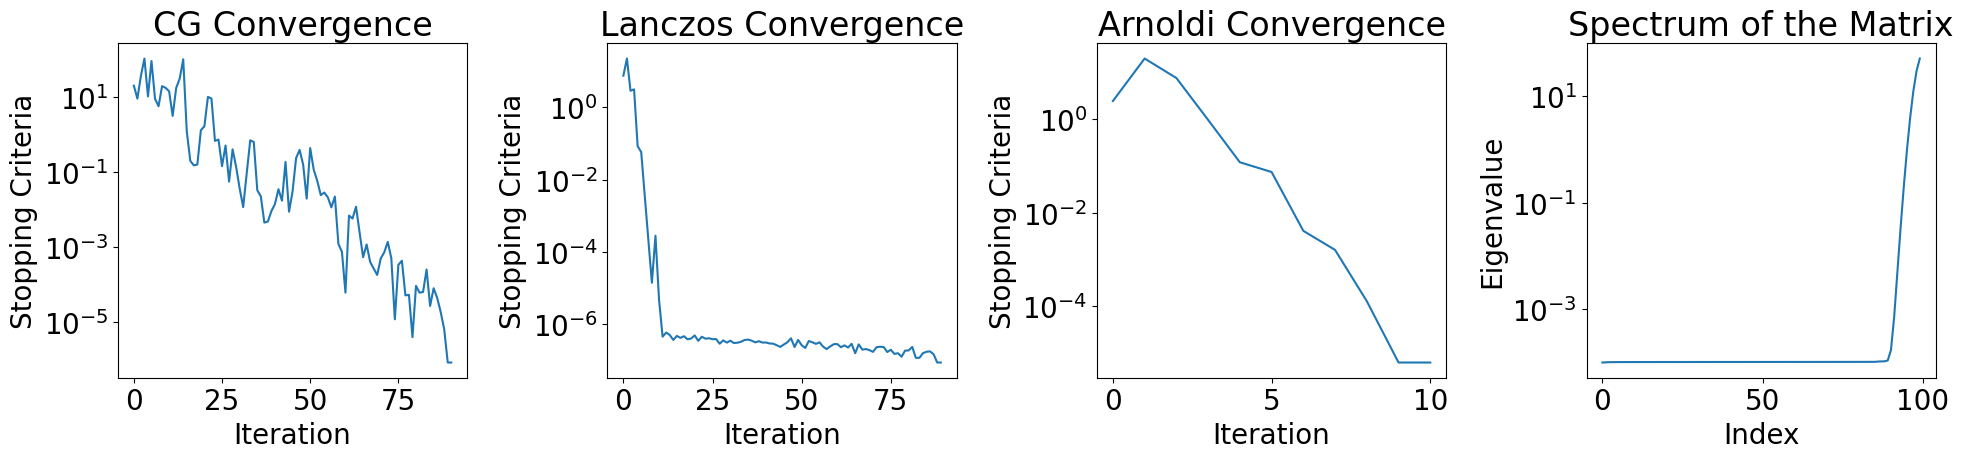

In [9]:
sol, info = cola.algorithms.cg(C, torch.randn(C.shape[-1]), pbar=True)
Q1,T,info2 = cola.algorithms.lanczos(C, pbar=True,max_iters=1000)
Q2,H,info3 = cola.algorithms.arnoldi(C,pbar=True, tol=1e-4,max_iters=1000)
eigs = cola.eig(cola.SelfAdjoint(C),pbar=True)[0]

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20
algorithms = [('CG', info), ('Lanczos', info2), ('Arnoldi', info3)]
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, (name, info) in enumerate(algorithms):
    axs[i].plot(info['errors'])
    axs[i].set_yscale('log')
    axs[i].set_title(f'{name} Convergence')
    axs[i].set_xlabel('Iteration')
    axs[i].set_ylabel('Stopping Criteria')

axs[3].plot(eigs)
axs[3].set_yscale('log')
axs[3].set_title('Spectrum of the Matrix')
axs[3].set_xlabel('Index')
axs[3].set_ylabel('Eigenvalue')

plt.tight_layout()
plt.show()

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'lanczos convergence on 300x300 matrix')

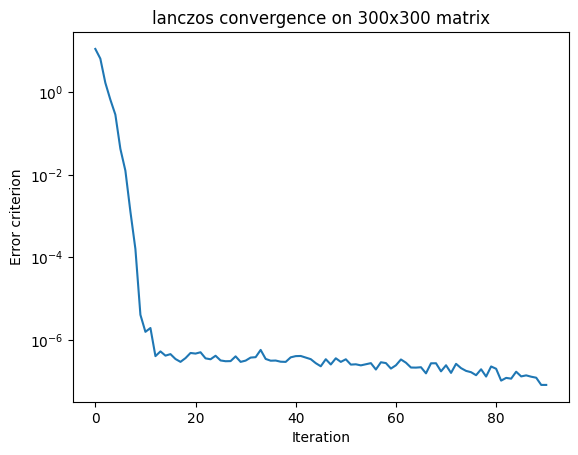

In [36]:
Q,T,info = cola.algorithms.lanczos(C, pbar=True,max_iters=1000)
plt.plot(info['errors'])
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Error criterion')
plt.title('lanczos convergence on 300x300 matrix')

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'CG convergence on 300x300 matrix')

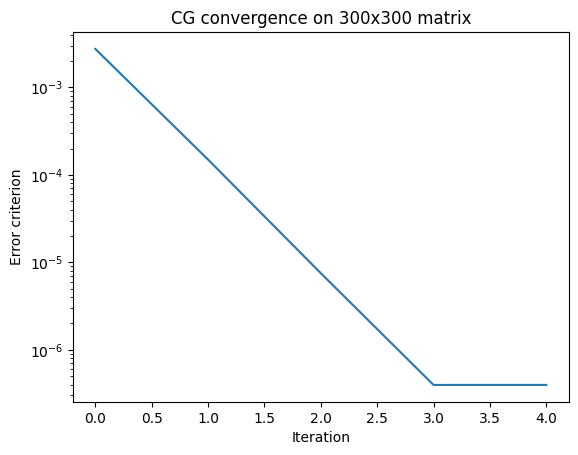

In [31]:
x, info = cola.algorithms.cg(C, torch.randn(C.shape[-1]), pbar=True)
plt.plot(info['errors'])
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Error criterion')
plt.title('CG convergence on 300x300 matrix')

Text(0, 0.5, 'Error criterion')

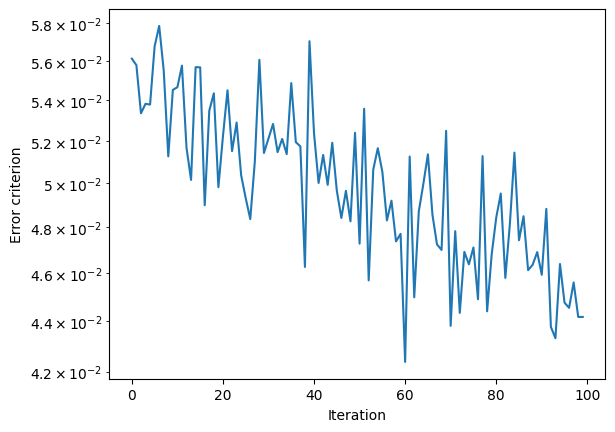

In [19]:
import matplotlib.pyplot as plt
plt.plot(info['errors'])
plt.yscale('log')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Error criterion')

In [11]:
eigs = cola.eig(C,pbar=True,tol=1e-4,method='iterative',max_iters=100)[0]

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

In [12]:
eigs = cola.eig(cola.SelfAdjoint(C),pbar=True,tol=1e-6,method='iterative',max_iters=1000)[0]

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
%debug

> /data/users/marc_f/cola/cola/utils/torch_tqdm.py(67)update_pbar()
     65 def update_pbar(error, tol, info):
     66     errstart = info.setdefault('errstart', error)
---> 67     progress = max(100 * np.log(error / errstart) / np.log(tol / errstart) - info['progval'], 0)
     68     progress = min(100 - info['progval'], progress)
     69     if progress > 0:

0.0 0.0 0.0001
0.0 0.0 0.0001
0.0 0.0 0.0001


In [3]:
import jax
P = jax.jit(cola.algorithms.power_iteration, static_argnums=(0,1,2,3,4,5))
a,v, info = P(C,pbar=True,info=True, tol=1e-2)

Running body:   0%|          | 0/100 [00:00<?,?it/s]

In [4]:
info

{}

In [5]:
inv= cola.inverse(cola.SelfAdjoint(C),pbar=True,info=True,method='iterative',tol=1e-2)
inv@C.ops.ones(C.shape[:1],C.dtype)

Running body_fun:   0%|          | 0/100 [00:00<?,?it/s]

Array([1.0324442 , 1.0674736 , 1.0347737 , 0.98613876, 1.1044202 ,
       0.9663931 , 0.971528  , 1.024705  , 1.0205234 , 1.1353885 ,
       1.0444454 , 0.9898392 , 1.0785855 , 1.0788229 , 1.0333313 ,
       1.0048164 , 0.979654  , 1.0294789 , 0.9680885 , 1.0490725 ,
       0.9666235 , 1.0007157 , 0.9818945 , 0.95554715, 1.0527668 ,
       0.95988727, 1.0225154 , 1.0347    , 1.0575426 , 0.91583496,
       0.9738532 , 0.96137923, 1.06761   , 1.1235957 , 0.9693678 ,
       1.072281  , 0.9646544 , 1.033497  , 1.0273887 , 0.95487016,
       1.0309575 , 1.0465803 , 0.9815441 , 0.9269393 , 0.96078527,
       0.9740837 , 1.0166415 , 0.95634097, 0.9290672 , 0.95050204,
       0.95362216, 1.0184866 , 0.9607811 , 1.0713391 , 0.89858437,
       0.97377306, 1.0029553 , 0.99890304, 0.97815055, 1.0609416 ,
       1.020308  , 0.96039903, 1.0276415 , 0.9667356 , 0.99179304,
       1.0198739 , 1.000656  , 1.0265386 , 0.9799702 , 1.0454187 ,
       0.96207404, 0.9343594 , 1.0151007 , 0.9371575 , 1.11296

In [6]:
inv.info

{'errors': array([0.05306752, 0.00300517], dtype=float32),
 'iteration_time': 0.12758525212605795,
 'iterations': Array(2, dtype=int32, weak_type=True)}

In [31]:
U,S,Vh= cola.svd(X, rank=300)

tensor(0.8943) tensor(1.1139)


In [21]:
U2 = (X@Vh.H)/S

In [22]:
torch.linalg.norm(U-U2)

tensor(0.)

In [23]:
print(U.shape,S.shape,Vh.shape,X.shape)

torch.Size([100000, 300]) torch.Size([300]) torch.Size([300, 300]) torch.Size([100000, 300])


In [24]:
diff  = cola.lazify(U)@cola.diag(S)@cola.lazify(Vh) - X

In [25]:
torch.linalg.norm(diff.to_dense())/torch.linalg.norm(X.to_dense())

tensor(1.2632e-06)

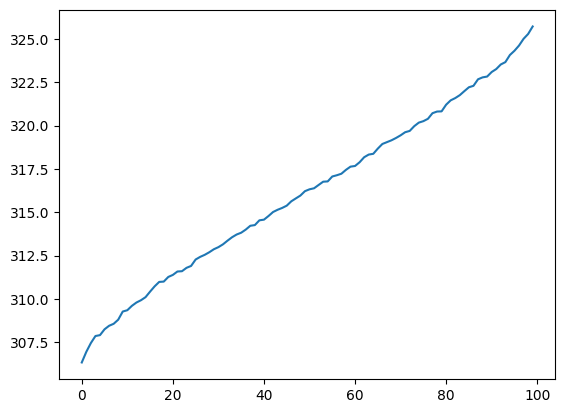

In [8]:
import matplotlib.pyplot as plt
plt.plot(S)

$X X^{T}$

# Linear Regression

In this notebook

In [12]:
import cola
import numpy as np

Phi = np.random.randn(100, 10)
y = np.random.randn(100)

In [13]:
beta = cola.pinv(cola.lazify(Phi))@y

(10, 10)
(10, 10)


# Gaussian Processes from scratch

Loading the Data
First, we need to load the dataset that we'll use for training and testing the GP model. Here, we're using the UCI Machine Learning Repository's "bike" dataset, and using only the last feature so that the predictions can be easily visualized.

In [ ]:
!wget -O bike.mat "https://www.andpotap.com/static/bike.mat"

In [2]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

In [3]:
from jax import numpy as jnp
import os
import numpy as np
from math import floor
from scipy.io import loadmat
import cola


def load_uci_data(data_dir, dataset, train_p=0.75, test_p=0.15):
    file_path = os.path.join(data_dir, dataset + '.mat')
    data = np.array(loadmat(file_path)['data'])
    X = data[:, -2:-1]
    y = data[:, -1]

    X = X - X.min(0)[None]
    X = 2.0 * (X / X.max(0)[None]) - 1.0
    y -= y.mean()
    y /= y.std()


    train_n = int(floor(train_p * X.shape[0]))
    return X[:train_n], y[:train_n], X[train_n:], y[train_n:]



train_x, train_y, test_x, test_y = load_uci_data(data_dir="./", dataset="bike")

dtype = jnp.float32
train_x  = train_x[:3000]
train_y  = train_y[:3000]

In [4]:
def rbf(ls, uscale):
    def f(x, y):
        # (n, d) and (m, d) -> (n, m)
        inner = x@y.T
        sqdist = (x**2).sum(1).reshape(-1, 1) + (y**2).sum(1) - 2*inner
        return uscale*jnp.exp(-sqdist / ls**2)
    return f

For a Gaussian Process, the predictive distribution of the function values at test inputs $X_*$
  given the training inputs 
$X$ and training targets 
$y$ is given by:

$$f_* | X, y, X_* \sim \mathcal{N}(\mu_*, \Sigma_*)$$

where:

$$\mu_* = K(X_*, X)[K(X, X) + \sigma^2_n I]^{-1}y$$

$$\Sigma_* = K(X_*, X_*) - K(X_*, X)[K(X, X) + \sigma^2_n I]^{-1}K(X, X_*)$$

Here, $K$ is the RBF kernel, $X$ are the training inputs, $y$ are the training targets, $X_*$ are the test inputs, and $\sigma^2_n$ is the noise variance.

We will get the variances from the diagonal of the predictive covariance.

In [5]:
ls, uscale, noise = .2, .5, 1e-3

def predicted_mean_std(ls,uscale,noise):
    kernel = rbf(ls=ls, uscale=uscale)
    Kxx= cola.ops.Dense(kernel(train_x, train_x))
    Kzx = cola.ops.Dense(kernel(test_x, train_x))
    Kzz = cola.ops.Dense(kernel(test_x, test_x))
    K = cola.PSD(Kxx + noise * cola.ops.I_like(Kxx))
    invK = cola.inverse(K)
    mu = Kzx@invK@train_y
    Sigma = Kzz - Kzx@invK@Kzx.T
    std = jnp.sqrt(cola.diag(Sigma,method='exact'))
    return mu,std

### Visualization
Next, we visualize the GP's prediction with the initial hyperparameters:

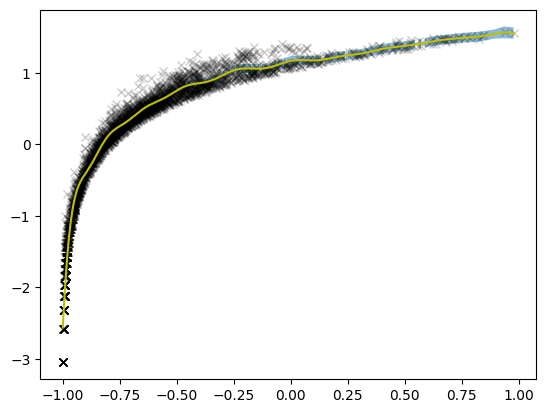

In [6]:
import matplotlib.pyplot as plt
mu, std = predicted_mean_std(ls,uscale,noise)
pstd = np.sqrt(std**2+noise) # prediction interval std
order = np.argsort(test_x.reshape(-1))
plt.plot(train_x.reshape(-1), train_y, 'kx', alpha=.2)
plt.plot(test_x[order].reshape(-1), mu[order], 'y')
plt.fill_between(test_x[order].reshape(-1), (mu - 2*pstd)[order], (mu + 2*pstd)[order], alpha=.5, interpolate=True)

As you can see, we have chosen the noise value too small for the data.
But lets fix that by optimizing these parameters using the marginal log likelihood

## Hyperparameter Optimization
Often, the initial hyperparameter values may not fit the data well. We can optimize these parameters using the marginal log-likelihood:

\[
\text{NLL} = \frac{1}{2} y^T (K + \sigma^2_n I)^{-1} y + \frac{1}{2} \log |K + \sigma^2_n I| + \frac{n}{2} \log 2\pi
\]

Here:
- \( y \) is the vector of target values.
- \( K \) is the kernel matrix computed using the RBF kernel between the training inputs.
- \( \sigma^2_n \) is the noise variance.
- \( I \) is the identity matrix.
- \( n \) is the number of training examples.

In [7]:
# compute the MLL
y = train_y
def NLL(params, key):
    ls,uscale,noise = params
    kernel = rbf(ls, uscale)
    Kxx= cola.ops.Dense(kernel(train_x, train_x))
    K = cola.PSD(Kxx + noise * cola.ops.I_like(Kxx))
    #K = cola.decompositions.cholesky_decomposed(K)
    invK = cola.inverse(K)
    minus2MLL =y.T@(invK@y)+cola.logdet(K,key=key)+jnp.log(2*jnp.pi)*y.shape[0]
    return minus2MLL/(2*y.shape[0])

Using optax and jax, we create a training loop to optimize the hyperparameters:

In [8]:
import optax
import jax
# create the training loop
opt = optax.adam(3e-3)

@jax.jit
def step(params,opt_state, key):
    loss, grads = jax.value_and_grad(NLL)(params, key)
    key = jax.random.split(key)[0]
    updates, opt_state = opt.update(grads, opt_state)
    params = optax.apply_updates(params, updates)
    return params, opt_state, loss, key

params = list(map(jnp.array,(ls,uscale,noise)))
opt_state = opt.init(params)
key = jax.random.PRNGKey(0)
for i in range(10):
    params,opt_state,loss,key = step(params,opt_state,key)
    print(f"loss: {loss.item():.3f}")

loss: 6.910
loss: 0.733
loss: 0.100
loss: -0.128
loss: -0.239
loss: -0.311
loss: -0.352
loss: -0.383
loss: -0.404
loss: -0.420


Now we have a new lengthscale, uncertainty scale and noise level.

In [9]:
ls, uscale, noise = params
print(f"ls = {ls:.2f}, uscale = {uscale:.2f}, noise = {noise:.2f}")

ls = 0.18, uscale = 0.52, noise = 0.01


### Final Visualization
Finally, we visualize the GP's prediction with the optimized hyperparameters. The new plot shows a better fit to the data:

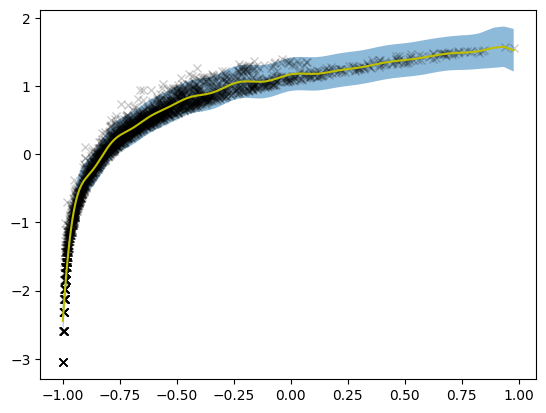

In [10]:
import matplotlib.pyplot as plt

mu, std = predicted_mean_std(ls,uscale,noise)
pstd = np.sqrt(std**2+noise) # prediction interval std
order = np.argsort(test_x.reshape(-1))
plt.plot(train_x.reshape(-1), train_y, 'kx', alpha=.2)
plt.plot(test_x[order].reshape(-1), mu[order], 'y')
plt.fill_between(test_x[order].reshape(-1), (mu - 2*pstd)[order], (mu + 2*pstd)[order], alpha=.5, interpolate=True)

In [ ]:
import logging
logging.getLogger().setLevel(logging.INFO)

# Spectral Clustering

TODO: Add half moons examples

TODO: Improve text description below.

In this application, we'll show how `CoLA` can be used to perform Spectral Clustering. This application allows us to showcase how to use our `Sparse` operator.

As data, we will use the arXiv paper citation network of High Energy Physics. This is a directed graph, but we'll make it undirected by noting that if a paper cites another one, then they are related. To pre-process the data we will use the following code:

In [1]:
import pandas as pd
from scipy.sparse import csr_matrix
import numpy as np


def load_graph_data(filepath, dtype, xnp, num_edges=-1):
    df = pd.read_csv(filepath, skiprows=4, delimiter="\t", header=None, names=["to", "from"])
    df = df[:num_edges]
    df2 = pd.read_csv(filepath, skiprows=4, delimiter="\t", header=None, names=["from", "to"])
    df2 = df2[:num_edges]
    df_undir = pd.concat((df, df2), axis=0)
    df_undir = df_undir.drop_duplicates()
    id_map = map_nodes_to_id(df_undir["from"].unique())
    N = len(id_map)
    print(f"Found {N:,d} nodes")
    for col in ["from", "to"]:
        df_undir[col] = df_undir[col].map(id_map)
    data = np.ones(shape=len(df_undir))
    row, col = np.array(df_undir["to"]), np.array(df_undir["from"])
    sparse_matrix = csr_matrix((data, (row, col)), shape=(N, N))
    out = transform_to_csr(sparse_matrix, xnp, dtype)
    data, col_ind, rowptr, shape = out
    return data, col_ind, rowptr, shape

def transform_to_csr(sparse_matrix, xnp, dtype):
    data = xnp.array(sparse_matrix.data, dtype=dtype)
    indices = xnp.array(sparse_matrix.indices, dtype=xnp.int64)
    indptr = xnp.array(sparse_matrix.indptr, dtype=xnp.int64)
    return data, indices, indptr, sparse_matrix.shape


def map_nodes_to_id(nodes):
    out = {}
    for idx in range(len(nodes)):
        out[int(nodes[idx])] = idx
    return out

The function `load_graph_data` creates the column indices and row pointers needed for the sparse [CSR format](https://en.wikipedia.org/wiki/Sparse_matrix). Now, we can load the data and create our `Sparse` adjacency matrix as follows

In [2]:
import torch
import cola
from cola import torch_fns as xnp

filepath = "/home/pop/Downloads/cit-HepPh.txt"
num_edges = 100
dtype = torch.float64
data, col_ind, rowptr, shape = load_graph_data(filepath, dtype, xnp, num_edges)
Ad = cola.ops.Sparse(data, col_ind, rowptr, shape)

Found 84 nodes


/home/pop/cola/cola/ops/operators.py:56: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at ../aten/src/ATen/SparseCsrTensorImpl.cpp:53.)
  self.A = self.ops.sparse_csr(indptr, indices, data)


Given the adjacency matrix, we can now create the normalized Laplacian defined as $L=I - D^{-1/2} A D^{-1/2}$, where $D$ is the diagonal matrix that contains the degree of each node, $A$ is the adjecency matrix and $I$ is the identity. We can create the Laplacian operator really easily in `CoLA` as

In [3]:
Deg = cola.ops.Diagonal(Ad @ xnp.ones(shape=(Ad.shape[0], ), dtype=dtype))
Id = cola.ops.I_like(Deg)
Lap = Id - cola.inverse(cola.sqrt(Deg)) @ Ad @ cola.inverse(cola.sqrt(Deg))
Lap = cola.SelfAdjoint(Lap)

Where I added the `SelfAdjoint` annotation at the end to ensure that `CoLA` dispatches algorithms for this type of symmetric operator. Spectral Clustering requires that we compute the eigenvectors of the smallest eigenvalues and use those eigenvectors as an embedding of our data. Once we do this, we can then use k-means to cluster points nearby as those points are related to cliques in the original graph.

In [4]:
from sklearn.cluster import KMeans

embedding_size, n_clusters = 8, 8
eigvals, eigvecs = cola.eig(Lap, method="lanczos")
x_emb = eigvecs[:, :embedding_size].to_dense()
kmeans = KMeans(n_clusters=n_clusters).fit(x_emb)
print(kmeans.labels_)

[2 4 4 4 4 4 1 0 4 2 2 4 4 4 4 4 4 4 4 0 0 0 2 0 0 0 2 1 1 1 7 1 1 1 1 1 1
 2 2 2 2 2 6 5 5 3 5 5 7 5 5 6 5 5 6 6 6 6 7 7 7 7 7 7 7 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 4 5]


/home/pop/venv/cola/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Boundary Value PDEs

In this example we will show how CoLA can be used to solve linear and nonlinear boundary value PDEs.

## Laplace Equation $\Delta u = 0$

For this example we will solve the Laplace equation on an irregularly shaped domain with given boundary conditions using a finite difference discretization.

First lets create a 1000 x 1000 point coordinate mesh.

In [1]:
import numpy as np
import jax.numpy as jnp
import scipy
import jax


N=1000
ndims = 2

xgrid = jnp.linspace(-1,1,N)
xygrid = jnp.stack(jnp.meshgrid(*(ndims*[xgrid])),axis=-1)
dx = xgrid[1]-xgrid[0]
x,y = xygrid.transpose((2,0,1))

With the mesh, lets define the geometry of the PDE domain and boundary conditions. The domain need not be square as shown below. For boundary conditions, we will set them to be $B(x,y) = (x+y)\cos(2x)$ on the boundary of this domain.

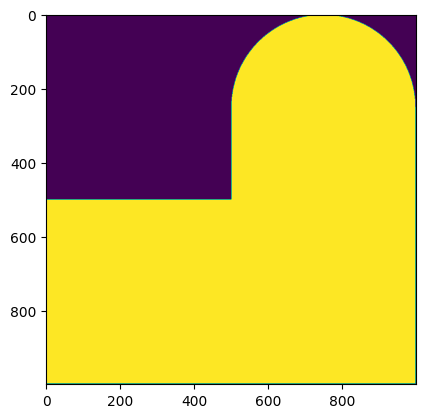

In [2]:
domain = (((x>0)|(y>0))&((y>-.5)|((x-.5)**2+(y+.5)**2<.5**2))) # chosen for example
# reduce the domain by one pixel leave space for the boundary conditions
domain &= ~(scipy.signal.convolve2d((~domain).astype(np.float32),jnp.ones((3,3)),mode='same',fillvalue=1)>0)
domain_ids, = domain.reshape(-1).nonzero()

BCS = jnp.where(domain,jnp.zeros_like(x),(x+y)*jnp.cos(2*x))


import matplotlib.pyplot as plt
plt.imshow(domain)
plt.show()


Now we need to define the Laplacian $\Delta$ as it acts on this discretized domain. 
Supposing we have the two dimensional array $v[i,j]$ representing the values on the grid, we can use the centered difference stencil for second derivatives $\partial_x^2 v(x_i,y_j) = (v[i+1, j] - 2*v[i, j] + v[i-1, j])/h^2$ + O(h^3)$.

Equivalently, we can write this as a convolution $\partial_x^2 v(x_i,y_j) =(1/h^2) (\begin{bmatrix}1& -2 &1\end{bmatrix} * v)[i,j] + O(h^3)$ where $*$ is the discrete convolution. The discretized 2d Laplacian is therefore

$Lv = (\begin{bmatrix}1& -2 &1\end{bmatrix} * v + \begin{bmatrix} 1 \\ -2 \\ 1 \end{bmatrix} *v)/h^2$. 

From this matrix vector multiply, we can define the linear operator using CoLA.

In [3]:
import cola
from jax import vmap, jit

def laplacian(x):
    x = x.reshape(ndims*(N,)) # unflatten to an ndims-dimensional grid
    cderiv = lambda x: jax.scipy.signal.correlate(x,jnp.array([1.,-2,1.])/dx**2,mode='same')
    return sum([jnp.apply_along_axis(cderiv,i,x) for i in range(ndims)]).reshape(-1)

Lfull = cola.LinearOperator(jnp.float32,shape=(N**ndims,N**ndims),matmat=jit(vmap(laplacian,-1,-1)))
Lfull = cola.PSD(Lfull)

Lfull is defined on the full $1000 \times 1000$ grid rather than our irregularly shaped domain. Restrict it to the domain, we just need to select the indices of the points inside the domain by slicing it, as you would a matrix.

In [4]:
L = Lfull[domain_ids,domain_ids]

Since this would ignore the boundary conditions, we can simply add them in on the right hand side.

In [5]:
RHS = -(Lfull@BCS.reshape(-1))[domain_ids]

Finally, let's solve the linear system represented by this discretized laplacian and the boundary conditions

$Lv = b$

and annotate that $L$ is a symmetric operator to speed up the computation.

In [6]:
L = cola.PSD(L)
inv = cola.inverse(L,pbar=True)
v  = inv@RHS

Running body_fun:   0%|          | 0/100 [00:00<?,?it/s]

Though we need to invert a $1000000 \times 1000000$ sized matrix, the solution is produced very quickly because CoLA never forms the matrix explicitly, and we can visualize the solution below.

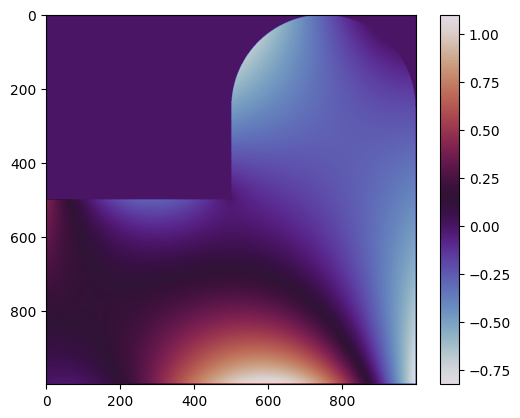

In [7]:
out_img = jnp.zeros(domain.shape)
out_img = out_img.at[domain].set(v)

plt.imshow(out_img,cmap='twilight')
plt.colorbar()
plt.show()

## Nonlinear BVP: Minimal Surface Equation

In this example we will consider solving the minimal surface equation, and example of a nonlinear boundary value PDE describing the shape of a soap bubble with a fixed boundary.
For the minimal surface, we would like to solve for the height $z$ of the surface at each point $(x,y)$ on the domain, and we make the assumption that the height is single valued.

The PDE is given by

$(1+z_x^2)z_{yy} - 2z_x z_y z_{xy} + (1+z_y^2)z_{xx}=0$

 where subscripts denote partial derivatives.
We will solve the PDE on the domain $[-1,1]^2$ with the boundary conditions

$z(x,\pm 1) = 1-x^2$ and $z(\pm 1, y) = 0$.

Before solving, first we will define the mesh and the nonlinear pde constraint.

In [8]:
N=50
xgrid = jnp.linspace(-1,1,N)
xygrid = jnp.stack(jnp.meshgrid(xgrid,xgrid),axis=-1)
dx = xgrid[1]-xgrid[0]

def pde_constraint(z):
    deriv = lambda x: jax.scipy.signal.correlate(x,jnp.array([-1/2,0,1/2])/dx,mode='same')
    deriv2 = lambda x: jax.scipy.signal.correlate(x,jnp.array([1.,-2,1.])/dx**2,mode='same')
    zx,zy = [jnp.apply_along_axis(deriv,i,z) for i in [0,1]]
    zxx,zyy = [jnp.apply_along_axis(deriv2,i,z) for i in [0,1]]
    zxy  = jnp.apply_along_axis(deriv,1,zx)
    return (1+zx**2)*zyy-2*zx*zy*zxy+(1+zy**2)*zxx

x,y = xygrid.transpose((2,0,1))
domain = (jnp.abs(x)<1)&(jnp.abs(y)<1)
boundary_vals = np.zeros_like(x)
boundary_vals[:,0] = 1-y[:,0]**2
boundary_vals[:,-1] = 1-y[:,-1]**2

@jit
def pde_constraint_on_domain(u):
    padded_domain = jnp.zeros(boundary_vals.shape)+boundary_vals
    padded_domain = padded_domain.at[domain].set(u.reshape(-1))
    padded_domain = pde_constraint(padded_domain)
    return padded_domain[domain].reshape(u.shape)

Now that we have defined the PDE constraint discretized on the domain,
we can now interpret the problem as finding the roots to a nonlinear function
$F(z)=0$ where $F$ is the discretized PDE constraint, and $z$ is a vector representing the heights at the different points on the domain.

To find the roots, we can employ Newtons method:

$z \gets z - J^{-1} F(z)$

where $J$ is the Jacobian of $z$.
While $J$ will be a large $N^2 \times N^2$ matrix, with CoLA we can perform this solve efficiently. For this we will use the CoLA [Jacobian](https://CoLA.readthedocs.io/en/latest/package/cola.ops.html#cola.ops.Jacobian) LinearOperator.

In [10]:
# Newton Raphson iteration
tol = 3e-3

z = jnp.zeros_like(x[domain]).reshape(-1) # initial guess
err = np.inf
while err > tol:
    F = pde_constraint_on_domain(z)
    err = jnp.max(jnp.abs(F))
    J = cola.ops.Jacobian(pde_constraint_on_domain,z)
    z -= cola.inverse(J, max_iters=100)@F
    print(f"PDE Error: {err:1.1e}")

PDE Error: 6.0e+02
PDE Error: 2.1e+02
PDE Error: 8.9e+01
PDE Error: 1.9e+01
PDE Error: 2.2e+00
PDE Error: 1.5e-01
PDE Error: 9.0e-04


Now let's visualize the results.

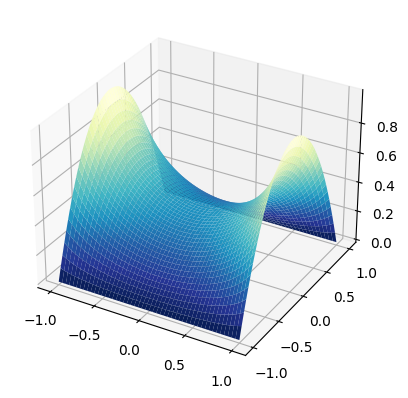

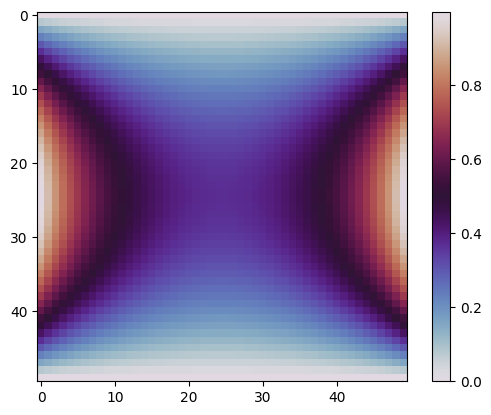

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
img = jnp.zeros(boundary_vals.shape)+boundary_vals
img = img.at[domain].set(z)
ax.plot_surface(x, y, img, cmap=plt.cm.YlGnBu_r)
plt.show()

plt.imshow(img,cmap='twilight')
plt.colorbar()
plt.show()

We see the minimal surface forms a familiar saddle shape, a solution of negative curvature like other solutions to the minimal surface equation.

# Diagonalizing a Hamiltonian (PDE eigenvalue problems)

## Solving the Schrodinger Equation for a 2d Harmonic oscillator

Solving the Schrödinger equation for a Quantum Harmonic Oscillator
In this example, we will show how to use the CoLA library to solve for the eigenvalues and eigenfunctions of the Hamiltonian operator for a two-dimensional quantum harmonic oscillator. The Hamiltonian operator is defined as

H = -Δ/2 + V(x)

where Δ is the Laplacian operator and V(x) is the potential energy function. We will be using a discretized Laplacian on a square grid and a simple harmonic potential V(x) = x²/2.

To start, let's create a 1000 x 1000 point coordinate mesh:

In [47]:
import numpy as np
import jax.numpy as jnp
from jax import vmap, jit
import jax
import cola
from jax.config import config; config.update("jax_enable_x64", False)
#jax.config.update('jax_platform_name', 'cpu')

N = 300
ndims = 2
grid = jnp.linspace(-30,30,N)
dx = grid[1]-grid[0]
xyz = jnp.stack(jnp.meshgrid(*(ndims * [grid])), axis=-1).reshape(-1, ndims)

Here, N is the number of points in each dimension, ndims is the number of dimensions, and grid represents the grid points from -30 to 30. dx represents the grid spacing, and xyz is an array of 2D points representing the coordinates of each point in the grid.

Next, we define the Laplacian operator. We use the same finite difference stencil as in the previous example to discretize the Laplacian.

In [48]:
def laplacian(x):
    x = x.reshape(ndims*(N,)) # unflatten to an ndims-dimensional grid
    cderiv = lambda x: jax.scipy.signal.correlate(x,jnp.array([1.,-2,1.])/dx**2,mode='same')
    return sum([jnp.apply_along_axis(cderiv,i,x) for i in range(ndims)]).reshape(-1)

L = cola.ops.LinearOperator(jnp.float64, shape=(N**ndims, N**ndims), matmat=jit(vmap(laplacian, -1, -1)))

The function laplacian calculates the second derivative along each dimension and sums them up. The result is reshaped to a 1D array and returned.

Next, we define the potential function V(x) as a diagonal operator:

In [50]:
def vfn(x):
    return (x * x).sum() / 2

V = cola.diag(vmap(vfn)(xyz).reshape(-1))

vfn calculates the potential energy for a given point in the grid. cola.diag creates a diagonal operator with the calculated potential energy values on the diagonal. vmap is a function from the JAX library that applies the function vfn to each point in xyz.

Next, we define the Hamiltonian operator and compute its eigenvalues and eigenvectors:

In [53]:
H = -L / 2 + V
energy_levels, eigenfunctions = cola.eig(cola.Symmetric(H))

/data/users/marc_f/cola/cola/jax_fns.py:156: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in zeros is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return jnp.zeros(shape=shape, dtype=dtype)
/data/users/marc_f/cola/cola/jax_fns.py:164: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in array is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return jnp.array(arr, dtype=dtype)


The Hamiltonian operator H is defined as the sum of the kinetic energy operator (-Δ/2) and the potential energy operator (V). The cola.Symmetric function is used to inform CoLA that H is a symmetric operator which makes the eigenvalue calculation more efficient.

We then plot the lowest several eigenvalues:

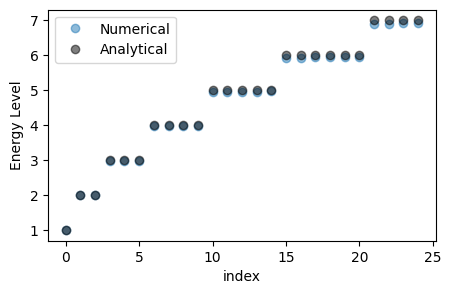

In [54]:
nm = np.stack(np.meshgrid(np.arange(10),np.arange(10)), axis=-1).reshape(-1, 2)
Enm = 1+nm[:,0]+nm[:,1]
nm = nm[Enm.argsort()]
Enm = np.sort(Enm)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, figsize=(5, 3))
axs.plot(energy_levels[:25], 'o',alpha=0.5, label="Numerical")
axs.plot(Enm[:25], 'o', color='k',alpha=0.5, label="Analytical")
plt.legend()
plt.xlabel("index")
plt.ylabel("Energy Level")
plt.show()

Each point represents an eigenvalue, which corresponds to an energy level of the quantum harmonic oscillator. Up to errors produced by the finite boundary (at [-30,30]) and discretization, we see the familiar $E_{nm} = (1/2+n)+(1/2+m)$ energy levels for the 2d oscillator.

Lastly, we visualize the corresponding eigenfunctions:

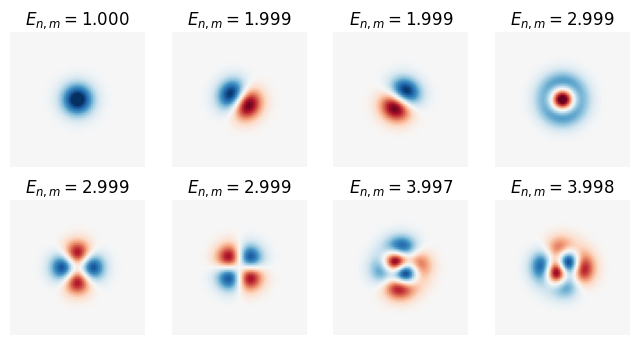

In [63]:
import numpy as np

fig, axs = plt.subplots(2, 4, figsize=(8, 4))
for i,ax in enumerate(axs.flatten()):
    l = 30
    ax.imshow(eigenfunctions[:, i].reshape(N,N)[N//2-l:N//2+l,N//2-l:N//2+l],
    extent=[grid[N//2-l],grid[N//2+l],grid[N//2+l],grid[N//2-l]],
    cmap='RdBu_r', vmin=-0.1, vmax=0.1)
    ax.set_title(r"$E_{{{}}} ={:.3f}$".format("n,m",e2[i]))
    ax.axis('off')

Each subplot represents an eigenfunction, reshaped to 2D and displayed as an image. The eigenfunctions correspond to the wave functions of the quantum harmonic oscillator at different energy levels. The color represents the value of the wave function at each point in the grid. The title of each subplot shows the corresponding eigenvalue, or energy level.

Through this example, we have shown how to solve for the energy levels and wave functions of a quantum harmonic oscillator using the CoLA library.

## Solving the Schrodinger Eq for the Hydrogen atom in 3d, diagonalizing non hermitian Hamiltonians via compactifying transform

In [ ]:
# e3 = jnp.linalg.eigvalsh(H.to_dense())
# print(np.sort(e3)[:10])

/data/users/marc_f/cola/cola/ops.py:78: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in eye is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return self @ self.ops.eye(self.shape[-1], dtype=self.dtype)


[ 41.57455   41.575943  41.576588  41.577152  41.5774    41.57964
  41.582     41.584194 152.37383  152.37447 ]


In [15]:
# import os
# import time
# import numpy as np
# import jax.numpy as jnp
# from jax import vmap, jit
# import jax
# from jax import jacfwd
# from jax.config import config
# import cola
# from jax.config import config; config.update("jax_enable_x64", True)
# jax.config.update('jax_platform_name', 'cpu')

# def square_compactification(x):
#     return jnp.arctan(x) * 2 / jnp.pi


# def inv_square_compactification(y):
#     return jnp.tan(y * jnp.pi / 2)


# # define the hydrogen atom Hamiltonian transformed coordinates
# N = 1_000
# ndims = 1

# grid = jnp.linspace(-1 + .001, 1 - .001, N)  # convert to 3d with mesgrid

# # grid = jnp.linspace(-1,1,N)
# # grid = jnp.linspace(-40,40,N)
# print(grid.dtype)
# wgrid = jnp.stack(jnp.meshgrid(*(ndims * [grid])), axis=-1).reshape(-1, ndims)
# idd = lambda x: x

# T = square_compactification  #idd#lambda x: jax.scipy.stats.norm.cdf(norm(x)/3)*x/norm(x)#jnp.log(1e-1+norm(x))*x/norm(x)#radial_hyperbolic_compactification
# Tinv = inv_square_compactification  #idd#lambda x: 3*jax.scipy.special.ndtri(norm(x))*x/norm(x)#(jnp.exp(norm(x))-1e-1)*x/norm(x)#inv_radial_hyperbolic_compactification
# xyz = vmap(Tinv)(wgrid)
# print(xyz[0], xyz[-1])
# DT = vmap(jacfwd(T))(xyz)  # (b, 3-out, 3-in)
# laplacian_factor2 = DT @ DT.transpose((0, 2, 1))
# laplacian_factor1 = vmap(lambda z: (jacfwd(jacfwd(T))(z) * jnp.eye(ndims)[None, :, :]).sum((1, 2)))(
#     xyz)
# dw = grid[1] - grid[0]
# deriv = jnp.array([-1 / 2, 0., 1 / 2]) / dw


# # deriv = jnp.array([-1.,1.])/dw
# # di = lambda x,i: sp.ndimage.correlate1d(x,deriv,axis=i,mode='constant')
# def hdiag(x):
#     cderiv = lambda x: jax.scipy.signal.correlate(x, jnp.array([1., -2, 1.]) / dw**2, mode='same')
#     dds = jnp.stack([jnp.apply_along_axis(cderiv, i, x).reshape(-1) for i in range(ndims)], axis=0)
#     embedded_diag = vmap(jnp.diag, -1, -1)(dds).transpose((2, 0, 1))
#     return embedded_diag


# jderiv = lambda x: jax.scipy.signal.correlate(x, deriv, mode='same')  # BCS?
# di = lambda x, i: jnp.apply_along_axis(jderiv, i, x)
# d = lambda x, axis=-1: jnp.stack([di(x, i) for i in range(ndims)], axis=axis)


# # lap= lambda x: scipy.ndimage.laplace(x,mode='constant')/dw**2
# def lap(x):
#     cderiv = lambda x: jax.scipy.signal.correlate(x, jnp.array([1., -2, 1.]) / dw**2, mode='same')
#     return sum([jnp.apply_along_axis(cderiv, i, x).reshape(-1) for i in range(ndims)])


# def vfn(x):
#     return (x * x).sum() / 2


# # def vfn(x):
# #     return (x*x).sum()/2


# @jit
# def laplacian(psi):
#     psi_grid = psi.reshape(*(ndims * (N, )))
#     #     return lap(psi_grid).reshape(psi.shape)
#     # return out

#     # return (hessian*jnp.eye(ndims)[None]).sum((1,2)).reshape(psi.shape)
#     dpsi = d(psi_grid)
#     hessian = d(dpsi).reshape(-1, ndims, ndims)
#     hessian = jnp.where(jnp.eye(ndims)[None] + 0 * hessian > 0.5, hdiag(psi_grid), hessian)
#     l1 = (dpsi.reshape(-1, ndims) * laplacian_factor1).sum(-1)
#     l2 = (hessian * laplacian_factor2).sum((1, 2))
#     return (l1 + l2).reshape(psi.shape)


# L = cola.ops.LinearOperator(jnp.float64, shape=(N**ndims, N**ndims),     matmat=jit(vmap(laplacian, -1, -1)))
# v = vmap(vfn)(xyz).reshape(-1)
# V = cola.diag(v)
# H = -L / 2 + V


# e2, v2, _ = cola.eig(H, method='arnoldi', max_iters=int(N * 1.))

float64
[-636.61924877] [636.61924877]


In [16]:
H.shape

(1000, 1000)

In [17]:
import numpy as np
es = np.linalg.eigvals(H.to_dense())

In [18]:
np.sort(e2)[:60]

array([-4.90754888e+03-1311.69329267j, -4.90754888e+03+1311.69329267j,
       -4.29453649e+03-1641.25722276j, -4.29453649e+03+1641.25722276j,
       -3.84794755e+03-1858.37727594j, -3.84794755e+03+1858.37727594j,
       -3.48252843e+03-2016.43973032j, -3.48252843e+03+2016.43973032j,
       -3.16767199e+03-2136.5828298j , -3.16767199e+03+2136.5828298j ,
       -2.88830824e+03-2229.78326565j, -2.88830824e+03+2229.78326565j,
       -2.63571636e+03-2302.61280987j, -2.63571636e+03+2302.61280987j,
       -2.40431751e+03-2359.37542428j, -2.40431751e+03+2359.37542428j,
       -2.19028874e+03-2403.07100833j, -2.19028874e+03+2403.07100833j,
       -1.99087537e+03-2435.8888709j , -1.99087537e+03+2435.8888709j ,
       -1.80401439e+03-2459.48436367j, -1.80401439e+03+2459.48436367j,
       -1.62811452e+03-2475.14347346j, -1.62811452e+03+2475.14347346j,
       -1.46191924e+03-2483.90006492j, -1.46191924e+03+2483.90006492j,
       -1.30435261e+03-2486.5542206j , -1.30435261e+03+2486.5542206j ,
      

In [19]:
np.sort(es)[:20]

array([ 0.49999913,  1.49999185,  2.49997236,  3.49992991,  4.49985116,
        5.49971871,  6.49951162,  7.49920517,  8.49877097,  9.49817688,
       10.49738703, 11.49636184, 12.49505793, 13.49342818, 14.49142167,
       15.48898368, 16.48605563, 17.48257509, 18.47847573, 19.47368727])

# 2nd order optimization of neural nets using Gauss Newton

In this notebook we will show to easily build 2nd order optimizers using cola.

First let's generate a suitable classification dataset.


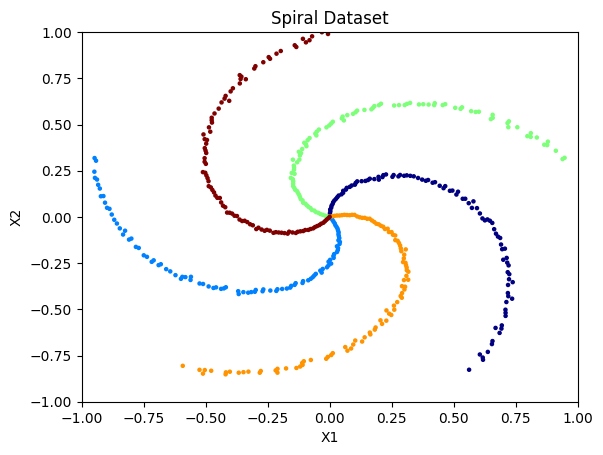

In [1]:
%load_ext autoreload
%autoreload 2

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Function to generate the spiral dataset
def generate_spiral_data(n_points, n_spirals, noise=0.02):
    X = np.zeros((n_points * n_spirals, 2))
    y = np.zeros(n_points * n_spirals, dtype=int)
    delta_theta = 4 * np.pi / n_spirals
    for i in range(n_spirals):
        theta = np.linspace(i * delta_theta, (i + 1) * delta_theta, n_points)
        r = np.linspace(0.0, 1, n_points)
        t = theta + np.random.randn(n_points) * noise
        X[i * n_points:(i + 1) * n_points] = np.column_stack((r * np.sin(t), r * np.cos(t)))
        y[i * n_points:(i + 1) * n_points] = i
    return X, y

# Generating the spiral dataset with 100 points and 5 spirals
n_points = 100
n_spirals = 5
X, y = generate_spiral_data(n_points, n_spirals)

# Plotting the spiral dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=5)
plt.title('Spiral Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)
def MLP(k=100):
    return nn.Sequential(
                nn.Linear(2, k), nn.SiLU(),
                nn.Linear(k, k), nn.SiLU(),
                nn.Linear(k, n_spirals))
                

/tmp/ipykernel_608834/4056217831.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
/tmp/ipykernel_608834/4056217831.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.long)


First lets train using 1000 epochs of Adam

In [61]:
learning_rate = 2
epochs = 500

model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

sgd_losses = []
for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    sgd_losses.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}')


Epoch [100/500], Loss: 0.6059665083885193
Epoch [200/500], Loss: 0.10361218452453613
Epoch [300/500], Loss: 0.07635311782360077
Epoch [400/500], Loss: 0.07144303619861603
Epoch [500/500], Loss: 0.0658678337931633


Now lets make a 2nd order method using cola, here we will use the Gauss-Newton PSD approximation to the Hessian.

First let's make it so we can call as an explicit function of it's parameters (like in jax).

In [47]:
import torch.func as tf
from torch.nn.utils import stateless

def flatten_params(params):
    shapes = [p.shape for p in params]
    flat_params = torch.cat([p.flatten() for p in params])
    return flat_params, shapes


def unflatten_params(flat_params, shapes):
    params = []
    i = 0
    for shape in shapes:
        size = torch.prod(torch.tensor(shape)).item()
        param = flat_params[i:i + size]
        param = param.view(shape)
        params.append(param)
        i += size
    return params

model = MLP()
flat_p, shape = flatten_params(list(model.parameters()))
flat_p = flat_p.detach().requires_grad_(True)

def stateless_model(flatparams, x):
    params = unflatten_params(flatparams, shape)
    names = list(n for n, _ in model.named_parameters())
    nps = {n: p for n, p in zip(names, params)}
    return stateless.functional_call(model, nps, x)

Now let's construct the Gauss Newton matrix to use as a PSD proxy for the Hessian in Newtons method.

$G = \frac{1}{n}\sum_i J(x_i)^TJ(x_i)$ where $J\in \mathbb{R}^{C \times p}$ is the Jacobian of the network for a single data point, $p$ is the number of parameters and $C$ is the number of outputs (classes).

(Note: A better approximation to the full Hessian is to include the Hessian of the loss with respect to the network outputs:
$G' = \frac{1}{n}\sum_i J(x_i)^THJ(x_i)$, but we will leave this out for simplicity.)

If we write the $J(X) \in \mathbb{R}^{nC \times p}$ to be the Jacobian of the network for the entire dataset $X=\{x_i\}_{i=1}^n$, we can write
$G = J(X)^TJ(X)/n$.

Here we will annotate the matrix as PSD so as to enable more efficient inversion methods, and we will add a small amount of Tikhonov regularization to the diagonal to improve the conditioning.

In [48]:
import cola

def flat_fn(p):
    return stateless_model(p, X).reshape(-1)

def GN(p):
    """Gauss-Newton approximation to the Hessian"""
    J = cola.ops.Jacobian(flat_fn, p)
    G = J.T @ J/ X.shape[0]
    return cola.PSD(G+1e-4*cola.ops.I_like(G))

Below we implement the optimization loop in this stateless manner.

We limit the tolerance and max iterations of the (iterative) solves so as to reduce the computation time. Though we don't do so here, adding a preconditioner (e.g. Jacobi, PivotedCholesky, Nystrom) would substantially accelerate the convergence of the solves.

In [51]:
def flat_loss(params):
    return criterion(flat_fn(params).reshape(X.shape[0],-1), y)

p = flat_p.clone()

gn_losses = []
for epoch in range(epochs):
    g = torch.autograd.grad(flat_loss(p), p)[0]
    p -= cola.inverse(GN(p),tol=1e-3, max_iters=20) @ g

    loss = flat_loss(p)
    gn_losses.append(loss.item())
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}')

Epoch [100/500], Loss: 0.07112730294466019
Epoch [200/500], Loss: 0.04868160933256149
Epoch [300/500], Loss: 0.040037162601947784
Epoch [400/500], Loss: 0.035282231867313385
Epoch [500/500], Loss: 0.03218817338347435


The 2nd order method converges faster per iteration than first order gradient descent. Try playing around with the gradient descent learning rate to see.

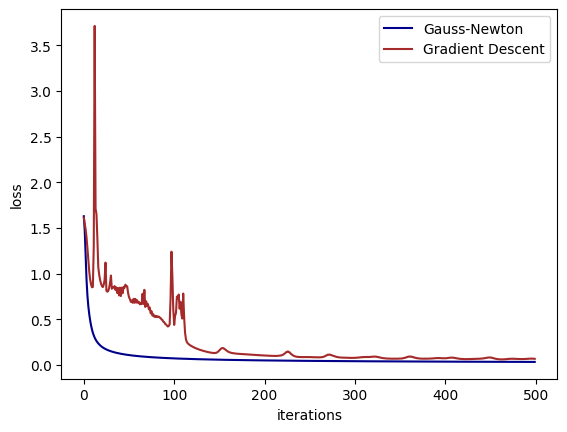

In [73]:
# choose some nice colors for the plot
plt.plot(gn_losses, label='Gauss-Newton', color='darkblue')
plt.plot(sgd_losses, label='Gradient Descent', color='brown')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.legend()

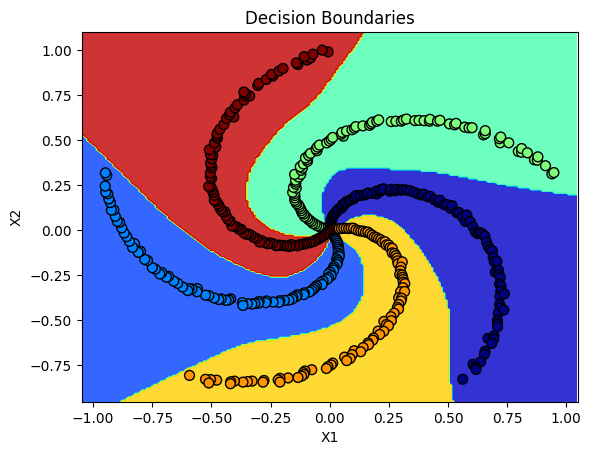

In [74]:
def plot_decision_boundary(model, X, y):
    # Creating a mesh grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predicting the class labels for the mesh grid
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
    Z = torch.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    # Plotting the decision boundaries
    plt.contourf(xx, yy, Z.detach().numpy(), alpha=0.8, cmap='jet')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, linewidth=1, cmap='jet')
    plt.xlim(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    plt.ylim(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)
    plt.title('Decision Boundaries')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

# Plotting the decision boundaries
plot_decision_boundary(model, X, y)

In [1]:
from plum import dispatch
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
@dispatch(cond = lambda a: a>0)
def test(a: int):
    return -a

@dispatch
def test(a: str):
    return a

@dispatch
def test(a):
    return a
    

In [3]:
test("a")

INFO:root:Dispatched on test(str)


'a'

In [4]:
test.methods

[Signature(int, implementation=<function test at 0x7f68c4491ab0>),
 Signature(str, implementation=<function test at 0x7f68c4491a20>),
 Signature(typing.Any, implementation=<function test at 0x7f68c4491b40>)]

In [5]:
test._resolved

[(<function __main__.test(a: int)>,
  None,
  <function __main__.<lambda>(a)>,
  0,
  False),
 (<function __main__.test(a: str)>, None, None, 0, False),
 (<function __main__.test(a)>, None, None, 0, False)]

In [6]:
with test.disable_methods((str,)):
    test(2)
    test("a")
    test("b")
    logging.warning(test(-2))
    logging.warning(test(22))

INFO:root:Dispatched on test(int) with cond=<lambda>
INFO:root:Dispatched on test(typing.Any)
INFO:root:Dispatched on test(typing.Any)
INFO:root:Dispatched on test(typing.Any)
INFO:root:Dispatched on test(int) with cond=<lambda>


In [7]:
test._resolved

[(<function __main__.test(a: int)>,
  None,
  <function __main__.<lambda>(a)>,
  0,
  False),
 (<function __main__.test(a: str)>, None, None, 0, False),
 (<function __main__.test(a)>, None, None, 0, False),
 (<function <function test at 0x7f68c4491ab0> with 2 registered and 1 pending method(s)>,
  Signature(str),
  None,
  None,
  True)]

In [8]:
test.methods

TypeError: None is not a callable object

In [5]:
test("a")

INFO:root:Dispatched on test(str)


'a'